!pip install pandas numpy matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import zipfile
import io
%matplotlib inline 

In [4]:
zip_url = 'https://archive.ics.uci.edu/static/public/186/wine+quality.zip'
with urllib.request.urlopen(zip_url) as response:
    with zipfile.ZipFile(io.BytesIO(response.read())) as z:
        with z.open('winequality-white.csv') as f:
            data = pd.read_csv(f, sep=';')

print("Dataset shape:", data.shape)  # Expected: (4898, 12)
print("\nFirst 5 rows:\n", data.head())
print("\nData types:\n", data.dtypes)  
print("\nSummary statistics:\n", data.describe()) 

Dataset shape: (4898, 12)

First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  


In [5]:
print("\nMissing values per column:\n", data.isnull().sum())  

# Removing duplicates
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates) 

data_cleaned = data.drop_duplicates(keep='first')
print("\nShape after removing duplicates:", data_cleaned.shape)  

outliers_summary = {}
for col in data_cleaned.columns:
    if data_cleaned[col].dtype in ['float64', 'int64']:  
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_cleaned[(data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)]
        outliers_summary[col] = len(outliers)

print("\nOutliers per column:\n", outliers_summary)


columns_to_clean = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
data_cleaned_pre = len(data_cleaned)
for col in columns_to_clean:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]
    print("\nShape after removing outliers:", data_cleaned.shape)  
    print(f"Removed {data_cleaned_pre - len(data_cleaned)} outlier rows.")


Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of duplicate rows: 937

Shape after removing duplicates: (3961, 12)

Outliers per column:
 {'fixed acidity': 106, 'volatile acidity': 133, 'citric acid': 223, 'residual sugar': 16, 'chlorides': 178, 'free sulfur dioxide': 44, 'total sulfur dioxide': 14, 'density': 6, 'pH': 46, 'sulphates': 96, 'alcohol': 0, 'quality': 156}

Shape after removing outliers: (3945, 12)
Removed 16 outlier rows.

Shape after removing outliers: (3771, 12)
Removed 190 outlier rows.

Shape after removing outliers: (3729, 12)
Removed 232 outlier rows.

Shape after removing outliers: (3717, 12)
Removed 244 outlier rows.

Shape after removing outliers: (3627,

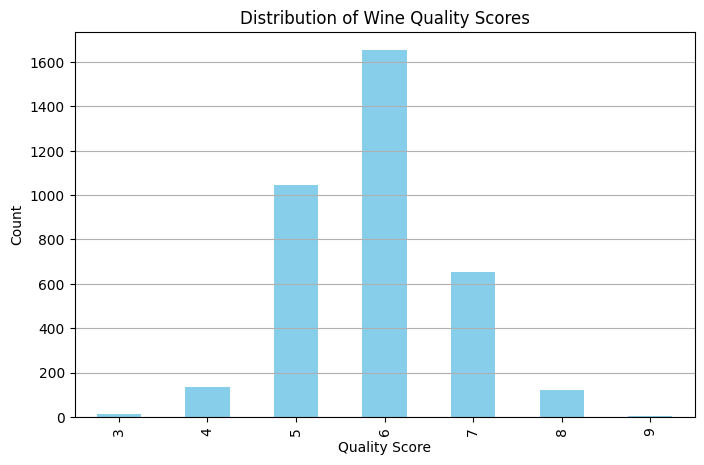

In [6]:
plt.figure(figsize=(8, 5))
data_cleaned['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
data_cleaned.hist(bins=20, figsize=(15, 10), color='lightgreen', edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

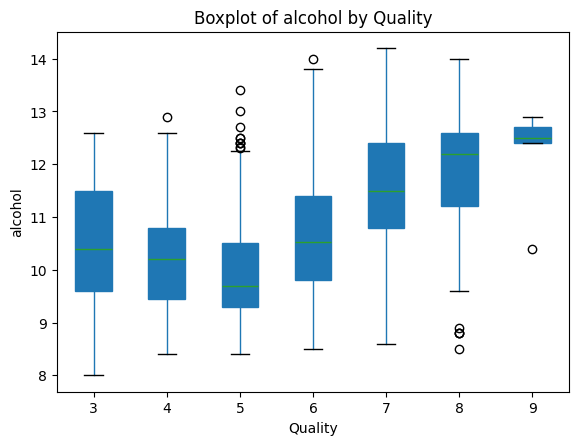

<Figure size 800x500 with 0 Axes>

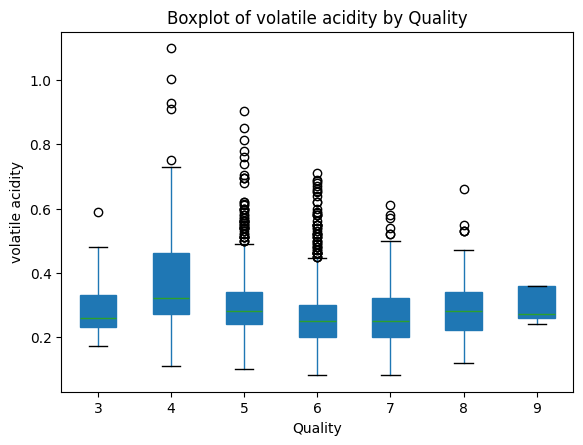

<Figure size 800x500 with 0 Axes>

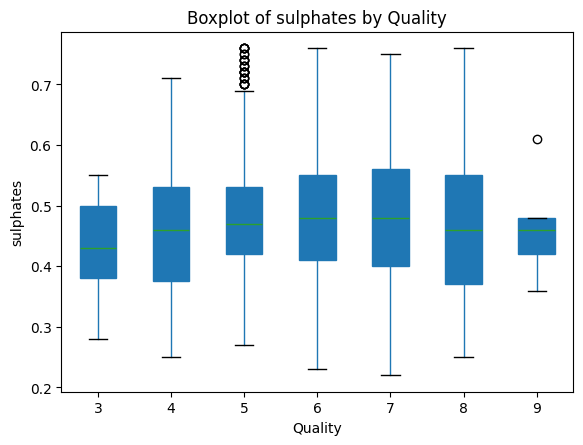

<Figure size 800x500 with 0 Axes>

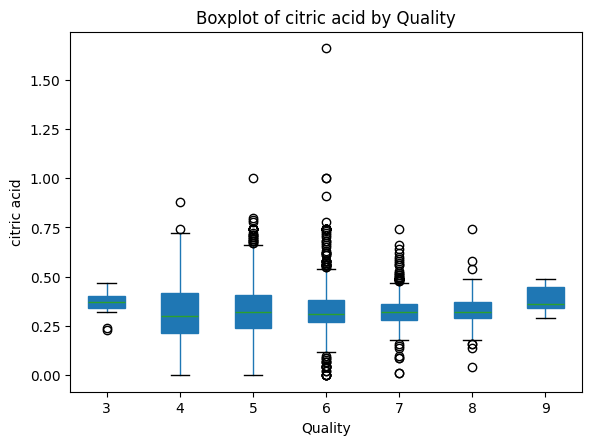

In [8]:
features_to_plot = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    data_cleaned.boxplot(column=feature, by='quality', grid=False, patch_artist=True)
    plt.title(f'Boxplot of {feature} by Quality')
    plt.suptitle('')  
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()

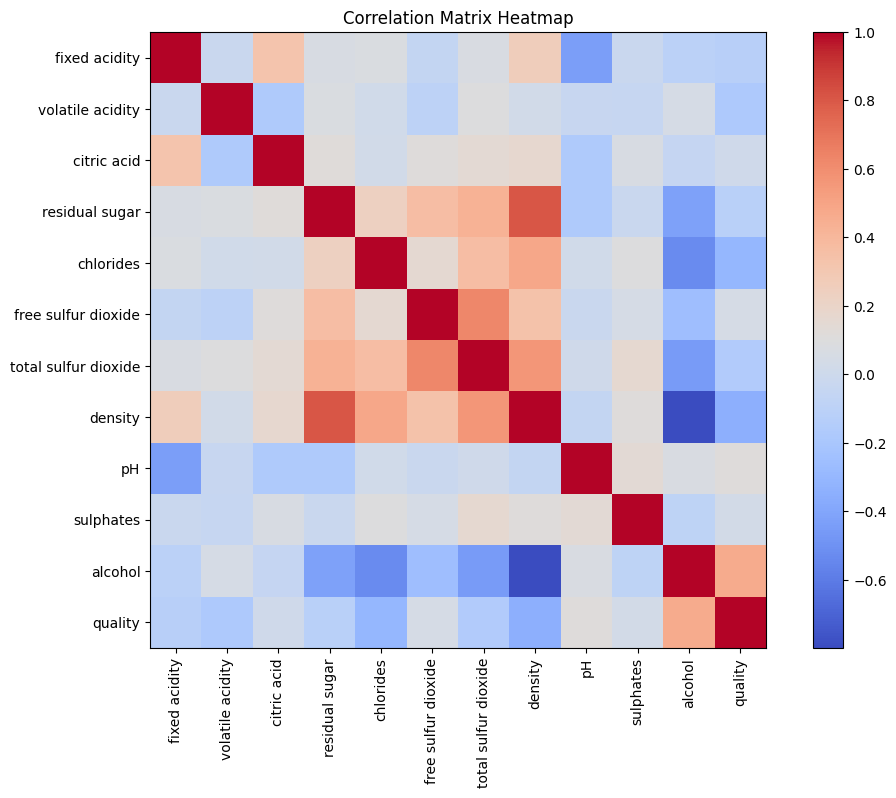


Correlations with Quality (sorted descending):
 quality                 1.000000
alcohol                 0.464093
pH                      0.112568
free sulfur dioxide     0.049537
sulphates               0.031810
citric acid             0.010178
residual sugar         -0.112554
fixed acidity          -0.119941
total sulfur dioxide   -0.157597
volatile acidity       -0.173910
chlorides              -0.300671
density                -0.345075
Name: quality, dtype: float64


In [9]:
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

print("\nCorrelations with Quality (sorted descending):\n", corr_matrix['quality'].sort_values(ascending=False))